In [ ]:
# Checking GPU availability and specifications on the machine
!nvidia-smi

Sat Dec  7 02:56:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Setting the current working directory to HOME
import os
HOME = os.getcwd()
print(HOME)

/content


### **Installing YOLO (You Only Look Once)**

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

# Installing the ultralytics library for model usage and performing system checks
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
# Importing the YOLO class and functions for displaying images in Jupyter notebooks
from ultralytics import YOLO

from IPython.display import display, Image

### **Inference with Pre-trained COCO Model**

In [ ]:
# Using YOLO to predict objects in an image of a dog and saving the results
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 241MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return to

/content


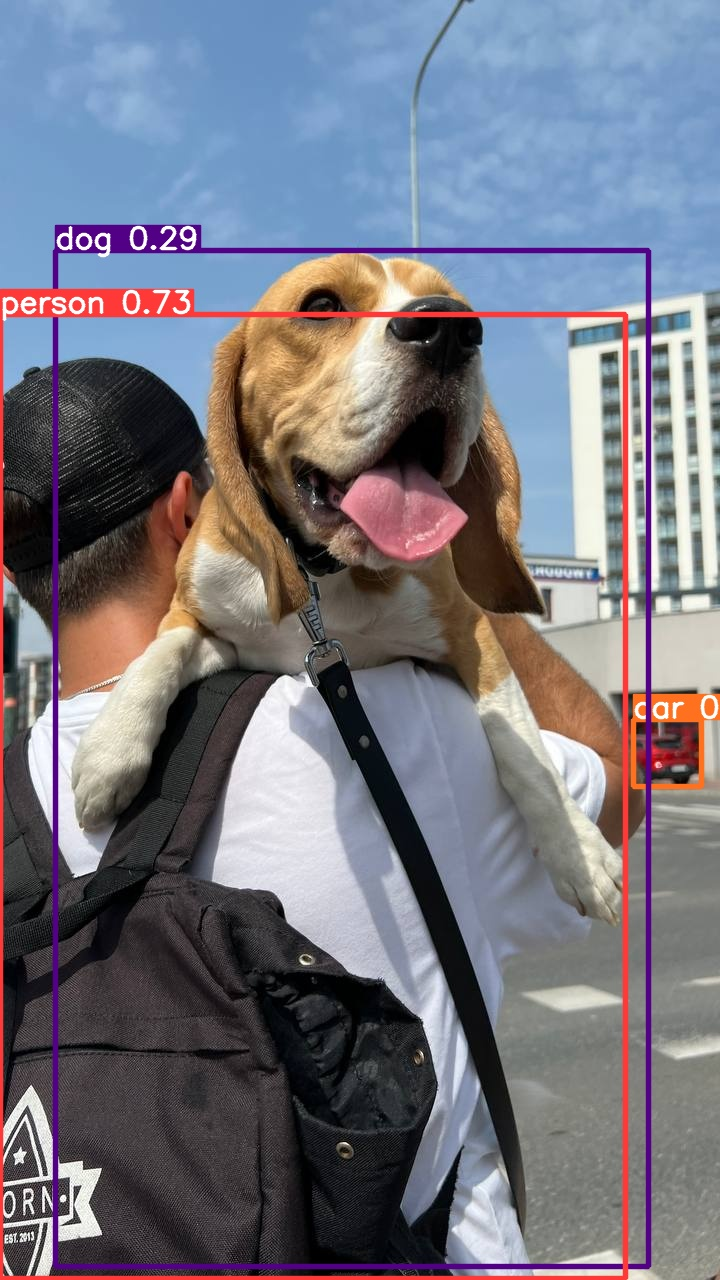

In [ ]:
# Displaying the predicted image after object detection
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### **Python SDK**

In [ ]:
# Predicting object in the image with a confidence threshold of 25% using a YOLO model
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
# Extracting bounding box coordinates for detected objects
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
# Extracting confidence scores for detected objects
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
# Extracting class IDs for detected objects
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
# Navigating to a datasets directory, installing Roboflow, connecting to a project using the API key, and downloading the YOLO datase
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fdz384zcskclAg3VzdEM")
project = rf.workspace("object-detection-ug9qz").project("football-plsayers-soccer")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-plsayers-soccer-1 in yolov8:: 100%|██████████| 772/772 [00:00<00:00, 4052.04it/s]


### **Custom Training**

In [ ]:
# Training the YOLO model using the downloaded dataset for 30 epochs with specified image size and plot generation
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 42.8MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return t

In [ ]:
# Listing files generated during training
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch401.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch402.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1733540314.9140df660595.1319.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch400.jpg


/content


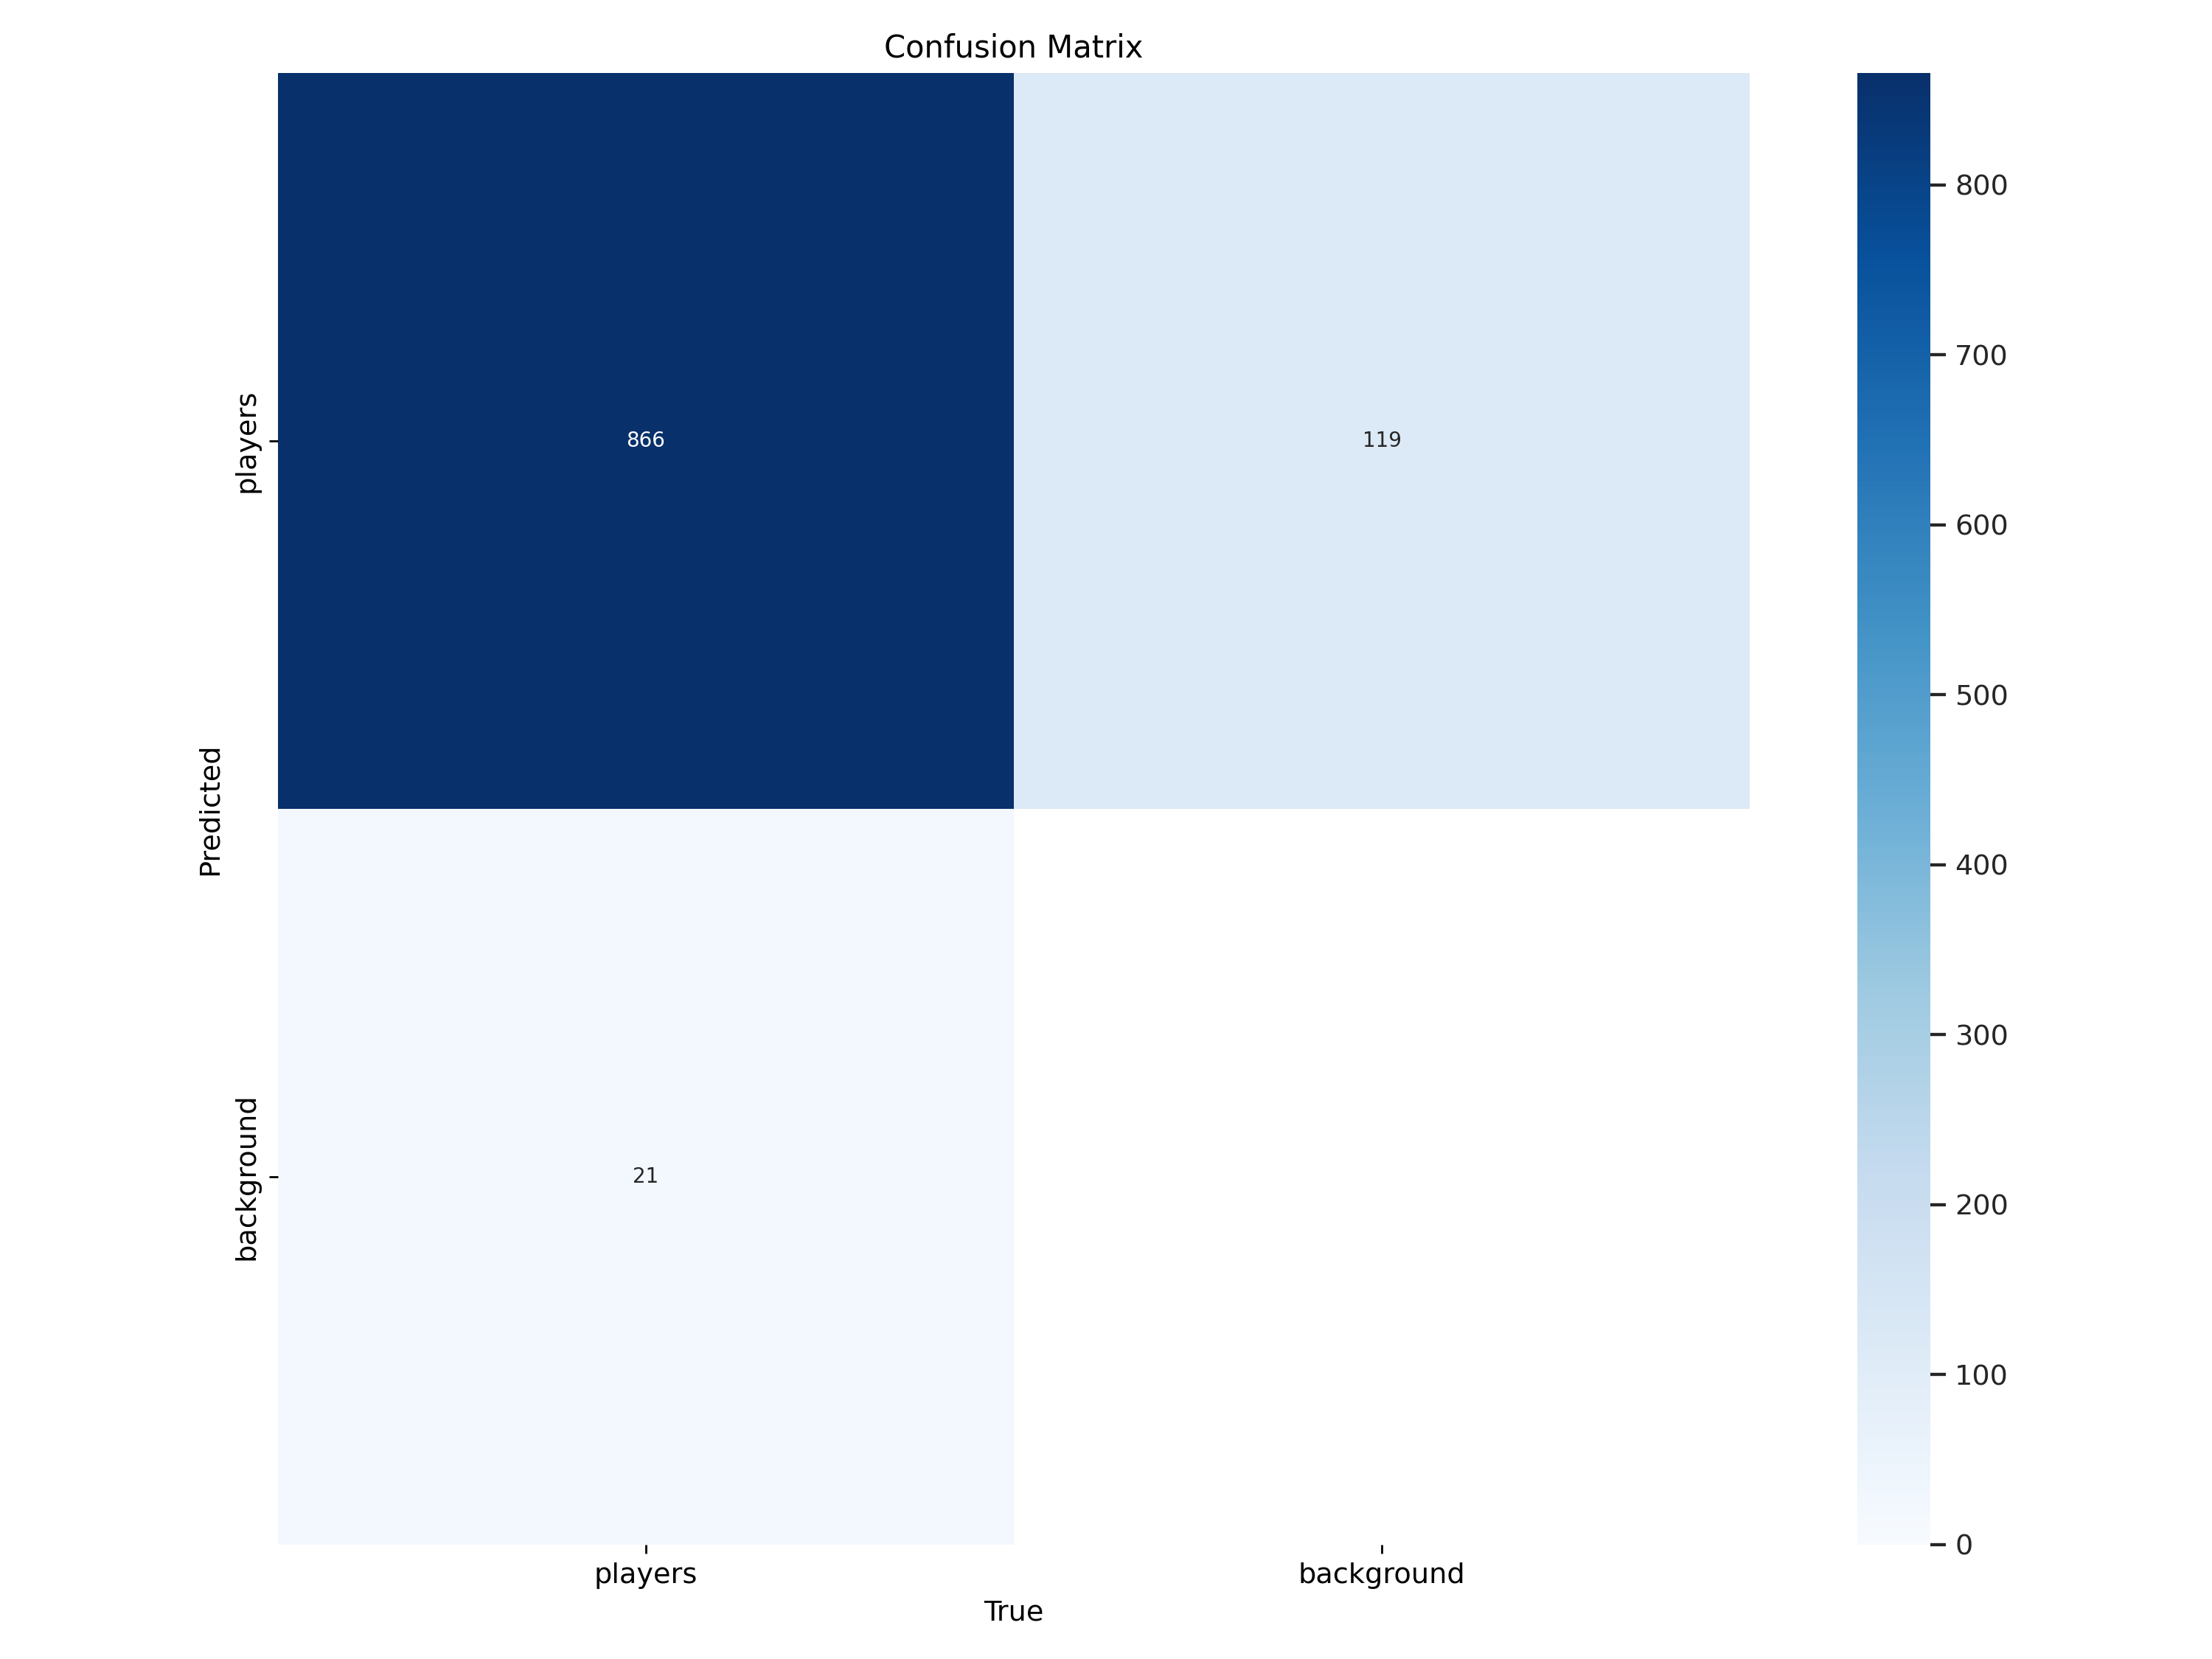

In [ ]:
# Displaying the confusion matrix from the training results
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


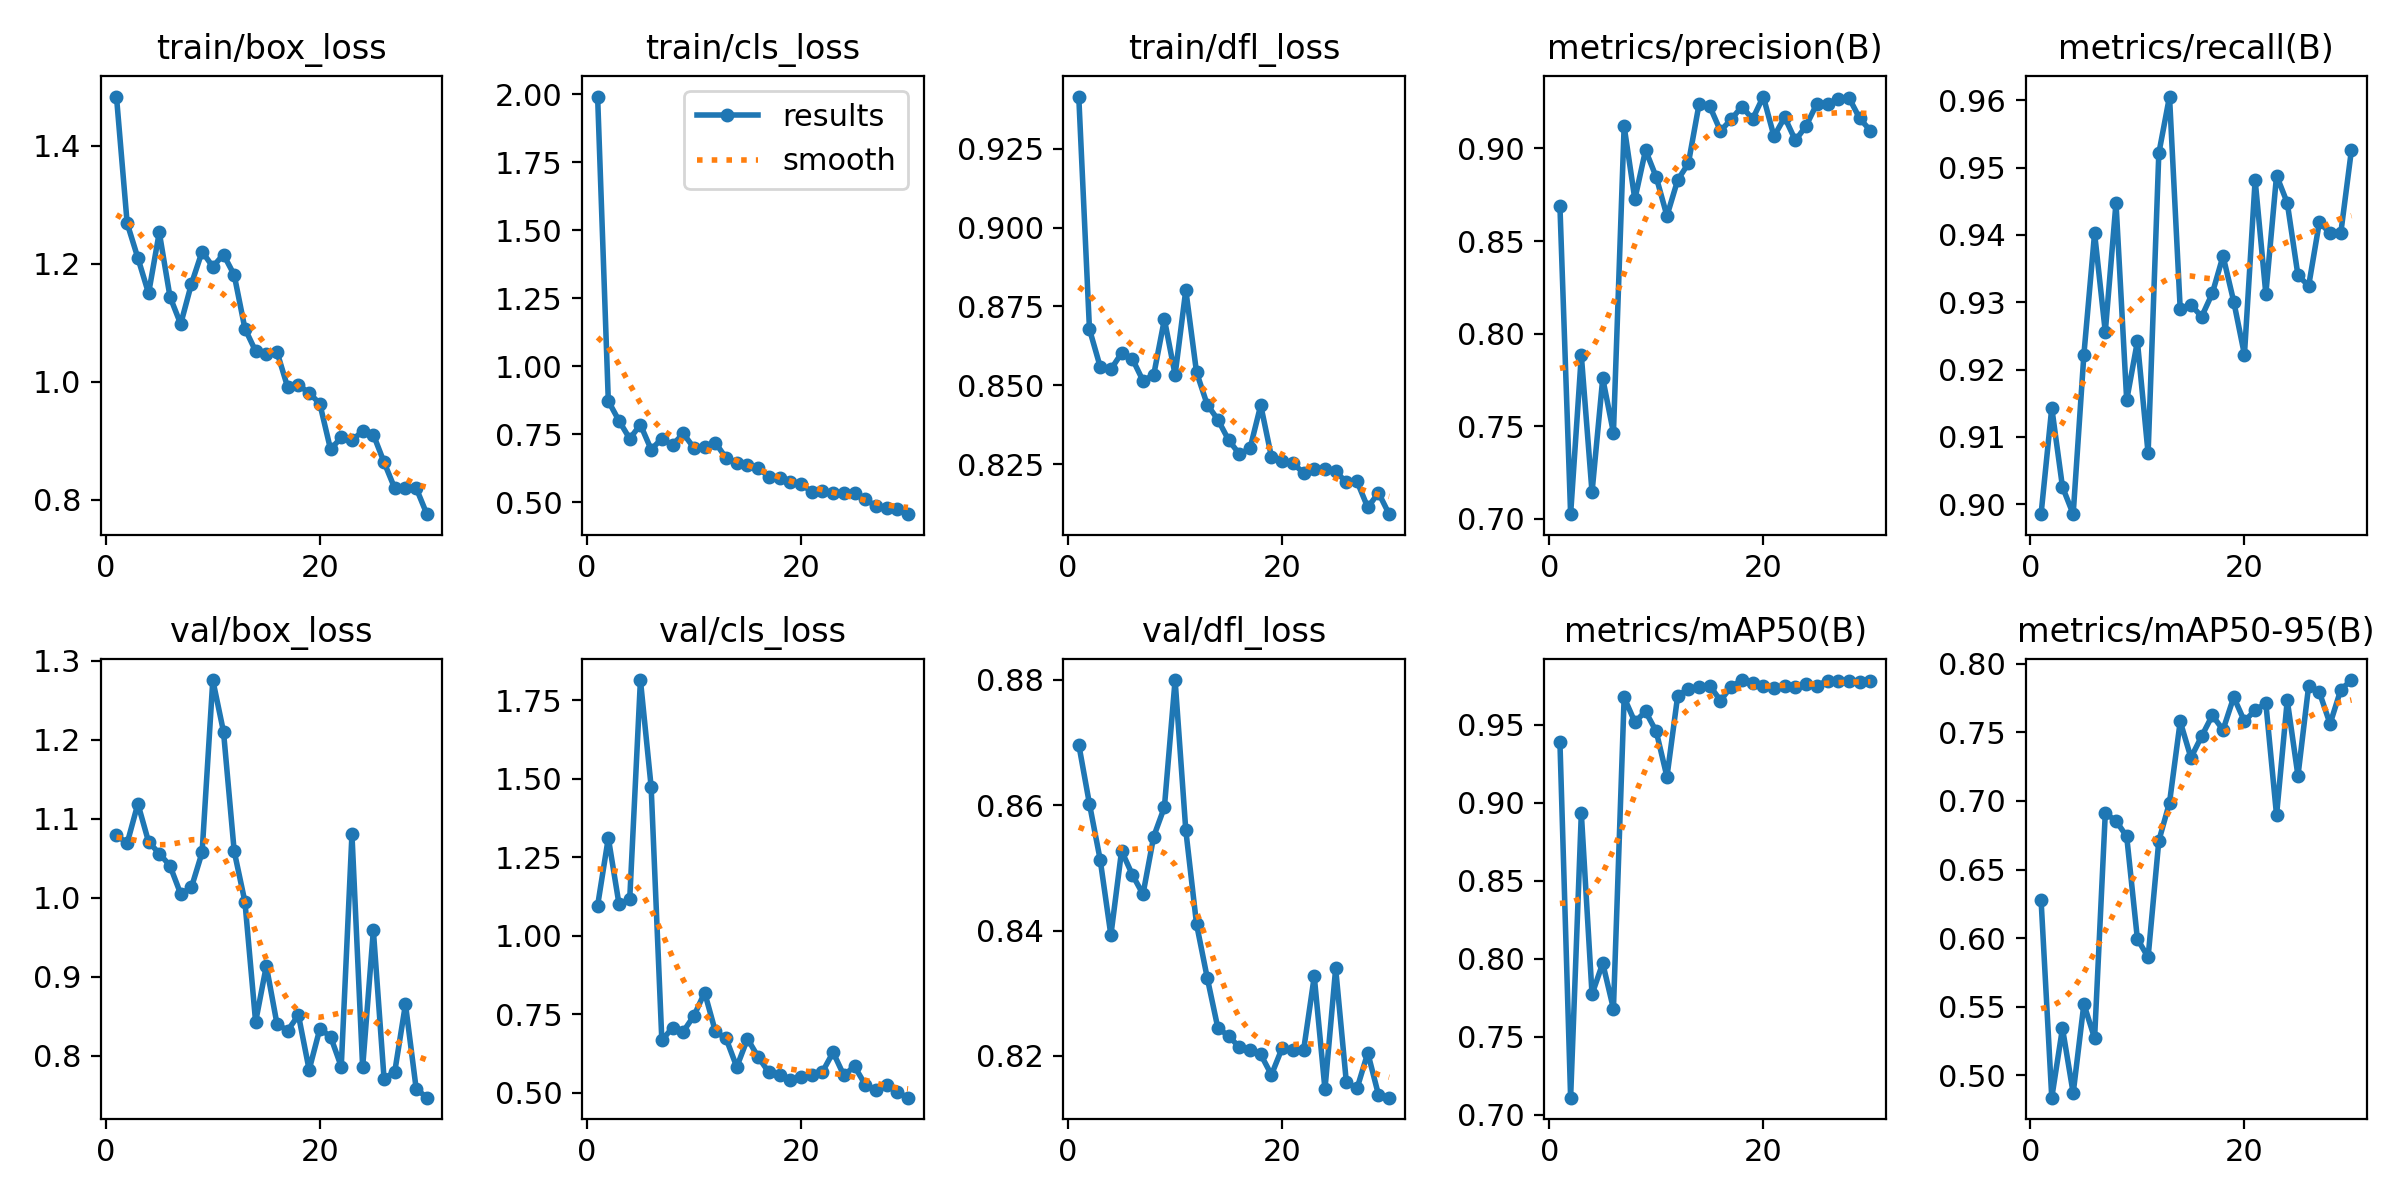

In [ ]:
# Displaying the overall training results
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


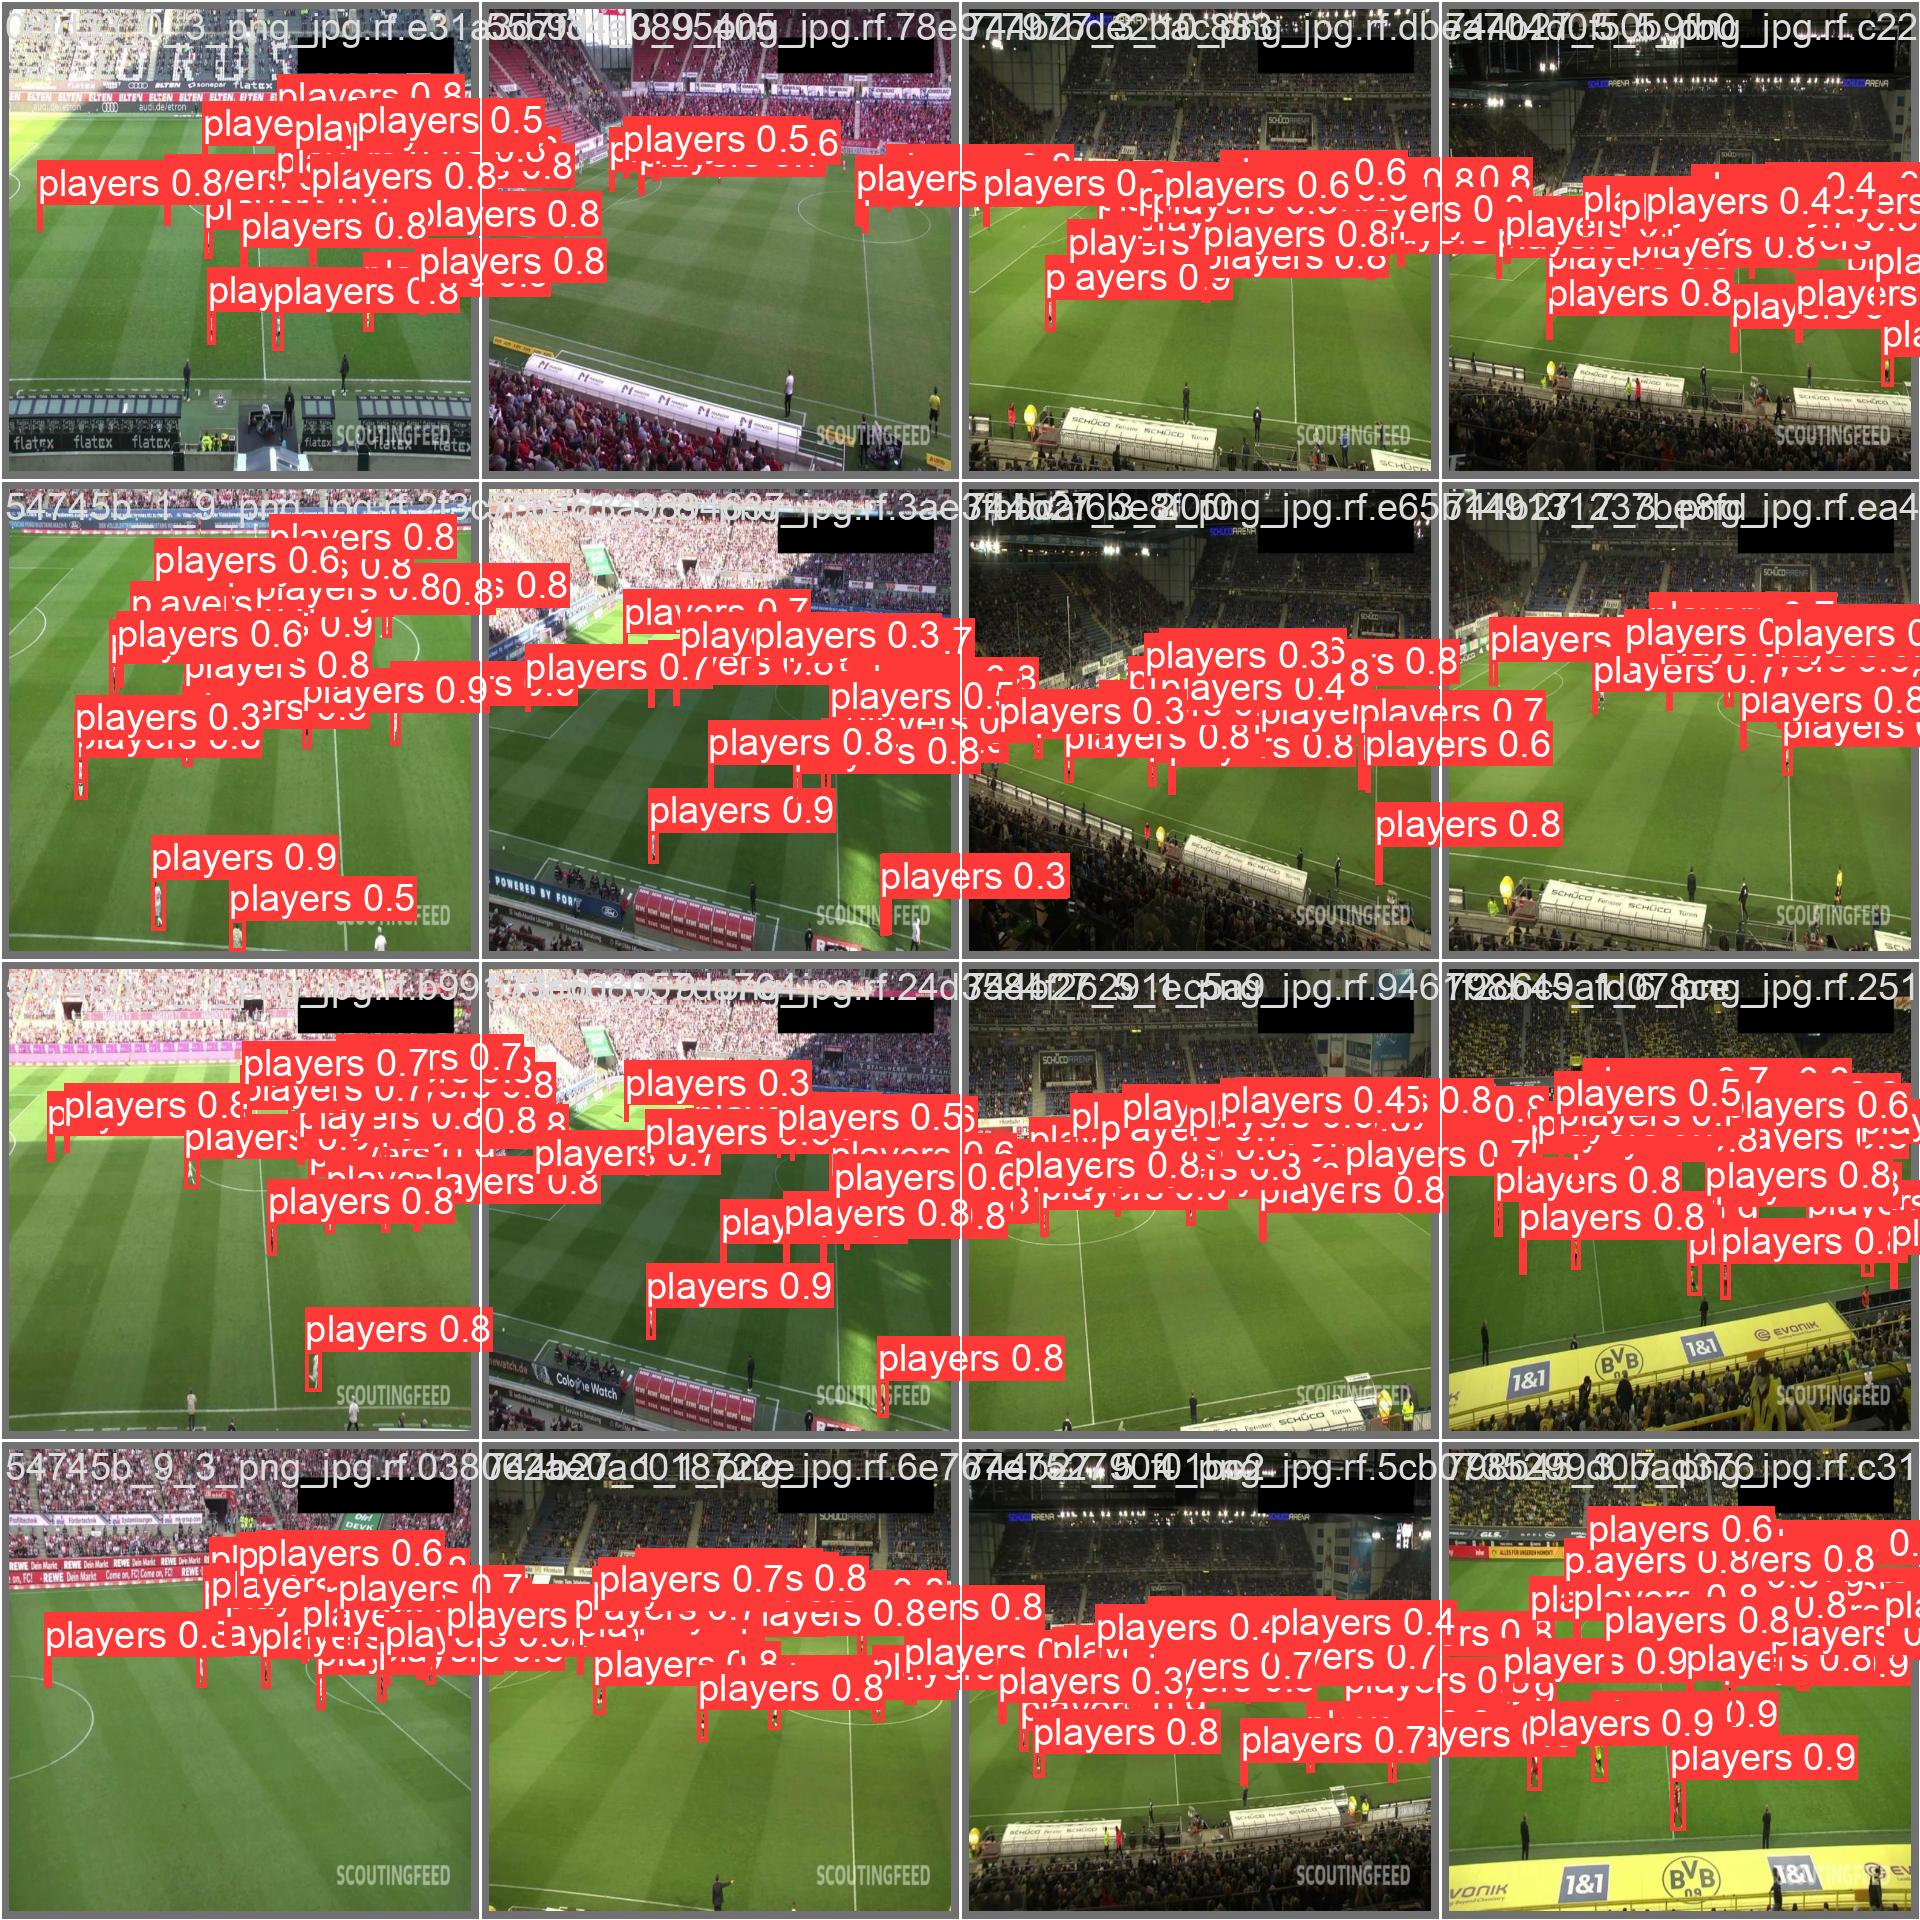

In [ ]:
# Displaying predictions on validation data
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800)

### **Validating Custom Model**

In [ ]:
# Validating the model on the dataset using the best-trained weights
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

### **Inference with Custom Model**

In [ ]:
# Running predictions on a video file using the best-trained model
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/1.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (188/5184) /content/1.mp4: 480x800 1 players, 14.7ms
video 1/1 (189/5184) /content/1.mp4: 480x800 1 players, 14.3ms
video 1/1 (190/5184) /content/1.mp4: 480x800 1 players, 14.4ms
video 1/1 (191/5184) /content/1.mp4: 480x800 (no detections), 14.9ms
video 1/1 (192/5184) /content/1.mp4: 480x800 4 playerss, 14.9ms
video 1/1 (193/5184) /content/1.mp4: 480x800 2 playerss, 14.7ms
video 1/1 (194/5184) /content/1.mp4: 480x800 1 players, 14.7ms
video 1/1 (195/5184) /content/1.mp4: 480x800 1 players, 15.5ms
video 1/1 (196/5184) /content/1.mp4: 480x800 2 playerss, 15.3ms
video 1/1 (197/5184) /content/1.mp4: 480x800 3 playerss, 15.0ms
video 1/1 (198/5184) /content/1.mp4: 480x800 2 playerss, 17.1ms
video 1/1 (199/5184) /content/1.mp4: 480x800 1 players, 15.6ms
video 1/1 (200/5184) /content/1.mp4: 480x800 3 playerss, 15.6ms
video 1/1 (201/5184) /content/1.mp4: 480x800 4 playerss, 15.3ms
video 1/1 (202/5184) /content/1.mp4: 480x800 4 players

In [ ]:
# Iterating through predicted image files and displays the first three, adding some spacing
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")